<a href="https://colab.research.google.com/github/LordLean/Machine-Learning/blob/master/ML_Labs/Seminar_Week_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Density Estimation. K-means clustering

Exercises on Kernel Density Estimation and K-means Custering make up this lab session. Again, it is up to you how you use the time. Try to have a little go at each method in the lab if you can, and then there are various links for further tutorials in your own time. 

Here are links to useful Python libraries for machine learning.

Scipy: https://www.scipy.org/

Scikit-learn: https://scikit-learn.org/stable/

## Kernel Density Estimation

Generate 50 random values from a normal (Gaussian) distribution with mean and standard deviation of your
choice. (Hint: you may refer back to last week's lab.)

In [0]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import scipy.linalg as linalg
from scipy.stats import norm

data = np.random.normal(0,1,(50,1)) # mean of 0, s.d. of 1, (50,1) column vector

Using a standard Gaussian function, use kernel density estimation to estimate the probability distribution. 

I recommend using the function **KernelDensity** from **sklearn.neighbors**

As an **extension**, you could try writing your own kernel density estimation function. 


An excellent resource on kernel density estimation is this tutorial:

https://jakevdp.github.io/PythonDataScienceHandbook/05.13-kernel-density-estimation.html

See also here:

https://jakevdp.github.io/blog/2013/12/01/kernel-density-estimation/

In [20]:
from sklearn.neighbors import KernelDensity

# - Available kernels are: gaussian, tophat, epanechnikov, exponential, linear, cosine

kde = KernelDensity(kernel="gaussian", bandwidth=0.2).fit(data)
kde.score_samples(data)

array([-3.16975882, -0.82934466, -0.75191539, -0.71444949, -1.43866243,
       -1.43273862, -1.37747882, -1.23277705, -0.84330152, -1.73375266,
       -1.44076397, -1.03210587, -0.76073674, -1.03596214, -1.06691121,
       -0.62835183, -0.62947182, -1.05331146, -1.04573058, -1.08789858,
       -0.62058067, -1.48999026, -0.67023329, -0.61852498, -0.60880543,
       -0.64241172, -1.40310189, -1.30096251, -0.61180622, -1.5274723 ,
       -1.06763089, -0.62595211, -1.62359148, -1.6195414 , -1.62727936,
       -1.6965196 , -1.45137243, -1.03360363, -1.3819791 , -1.54353749,
       -1.0885636 , -0.79704769, -1.40936763, -0.59704127, -3.21482209,
       -1.03057611, -1.45544174, -1.13282116, -1.05592311, -1.43407281])

[Shows available kernels](https://scikit-learn.org/stable/modules/density.html)

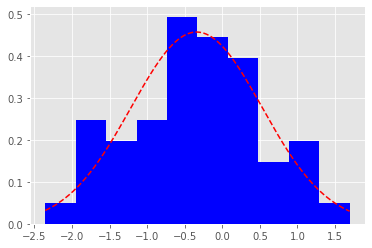

In [21]:
plt.style.use("ggplot")
hist = plt.hist(data, bins=10, density=True, color="blue")

x = np.arange(data.min(),data.max(),0.001)
y = stats.norm.pdf(x,data.mean(),data.std())
plt.plot(x,y,"r--")

plt.show()

In [22]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum() == 1 # Confirm normalization area under hist sums to 1.

False

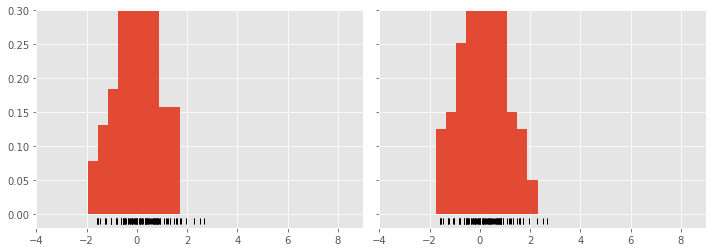

In [23]:
data = np.random.normal(0,1,(100,1)) 

fig, ax = plt.subplots(1, 2, figsize=(12, 4),
                       sharex=True, sharey=True,
                       subplot_kw={'xlim':(-4, 9),
                                   'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)
for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(data, bins=bins + offset, density=True)
    ax[i].plot(data, np.full_like(data, -0.01), '|k',
               markeredgewidth=1)

(-0.2, 8)

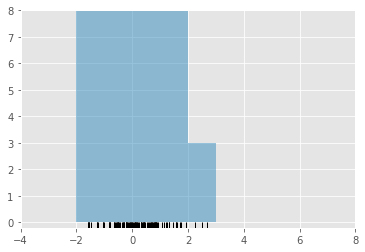

In [24]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(data, np.full_like(data, -0.1), '|k',
        markeredgewidth=1)
for count, edge in zip(*np.histogram(data, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1,
                                   alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-0.2, 8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  if sys.path[0] == '':


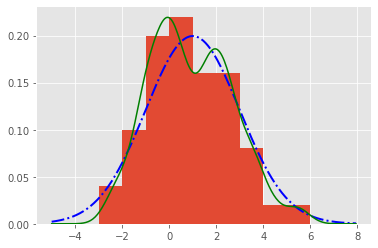

In [29]:
nbpts = 50 # Number of points to generate (50 in the brief, can be varied)
mu = 1 # the mean
sigma = 2 # the standard deviation

data = np.random.normal(mu,sigma,(nbpts,1))

# For comparison purposes I will include the histogram and the theoretical
# pdf (in thick dashed blue line)
binsize = 1 # bin size for the histogram
h = 0.5 # kernel window for kernal density estimation
edges = np.arange(-5,8,binsize) # varying the step size in the sequence means changing the number of bins. Consider what happens when changing the value of binsize
plt.hist(data, edges, normed=True)

pts = np.arange(-5,8,0.05) # the x values over which I want the PDF and the density estimation
y = stats.norm.pdf(pts,mu,sigma)
plt.plot(pts,y,'b-.',linewidth=2.0) # plot with thick dashed blue line.

# We will use KernelDensity function from sklearn
# instantiate and fit the KDE model
h = 0.5 # Bandwidth of kernel
kde = KernelDensity(bandwidth=h, kernel='gaussian') # Set kernel to Gaussian
kde.fit(data) # Estimate the model based on the data
log_dens = kde.score_samples(pts.reshape(-1,1)) # Calculate the density estimates for desired data points (these return log densities)
plt.plot(pts,np.exp(log_dens),'g-') # plot estimated densities in green
plt.show()

## Clustering with the k-means algorithm

As you will remember from the lecture, the k-means algorithm is a clustering technique. Given unlabelled
data, it tries to find meaningful groupings (clusters) of the data. In this exercise, you will generate data (in
1D as well as in 2D) and experiment with the algorithm using various values of k (remember that in the
absence of information, we do not know what the best value of k is).

You should use the function **KMeans** in **sklearn.cluster**

Here is an excellent tutorial on k-means and Python:

https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html

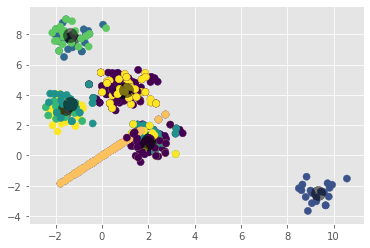

In [9]:
data = np.random.normal(0,1,(100,1))

for i in range(1,6):
  clusters = i

  X, y_true = make_blobs(n_samples=100, centers=clusters,
                        cluster_std=0.60, random_state=0)
  plt.scatter(data,data, s=50);

  kmeans = KMeans(n_clusters=clusters)
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)

  plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

  centers = kmeans.cluster_centers_
  plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

**Q1.** Start by generating 100 random values from a unimodal distribution (i.e., a distribution with just one
peak - in other words, we will assume all data are from the same class). You learned how to do this
last week! Apply k-means with k taking values from 5 to 1. Plot the final clustering to see what has
happened. Which value of k is best? Does that make sense? 



In [0]:
data = np.random.normal(0,1,(100,1)) # normal data is of course unimodal and give data standardized form.

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.1 , 0.35, 0.34,
        0.16, 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ]),
 array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14]),
 <a list of 24 Patch objects>)

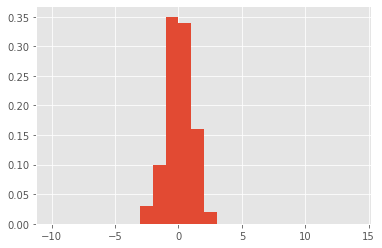

In [37]:
binsize = 1
edges = np.arange(-10,15,binsize) # binsize for varying step value
plt.figure(100)
plt.hist(data, edges, density=True)

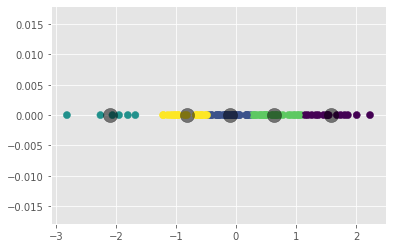

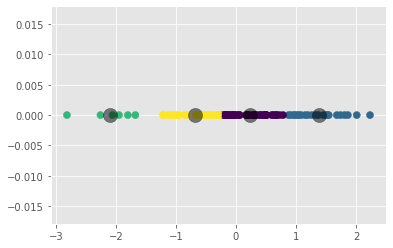

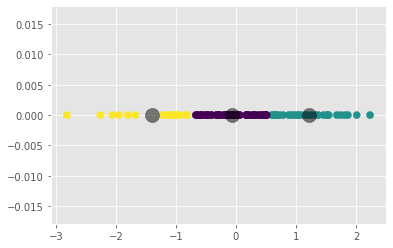

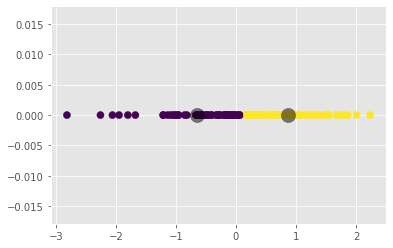

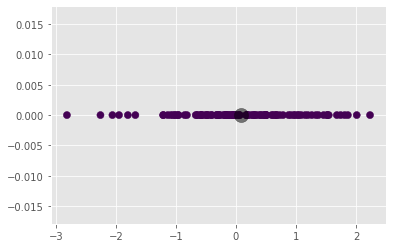

In [44]:
# Applying Kmeans with k values 5 -> 1

for k in np.arange(5,0,-1):

  kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
  idx = kmeans.predict(data) # predicts class membership
  plt.figure(k)
  plt.scatter(data[:,0], np.zeros(len(data[:,0])), c=idx, s=50, cmap="viridis")
  C = kmeans.cluster_centers_
  plt.scatter(C[:,0], np.zeros(len(C[:,0])), c="black", s=200, alpha=0.5)

plt.show()

**Q2.** Generate 200 random values from a bimodal distribution (i.e., a distribution with two peaks { in other
words, we now assume the data come from two classes that are not exactly overlapping). The simplest
way to do this is simply to generate N (with N between 1 and 200) data points from a first unimodal
distribution and then generate (200-N) data points from another unimodal distribution (with different
mean and standard deviations from the first - how different is for you to decide). Again, apply k-means
with k taking values from 5 to 1. Plot the final clustering to see what happened. Which value of k is
best? Does that make sense?

In [0]:
## Generate the data

# Generate 1D data from bimodal distribution (two clusters) 
nbpts1 = 123 # Number of points in first cluster -- You can vary this point to see effect of having more or less points in one cluster
mu1 = -2 # the mean of the first mode (shift it left or right to increase separation between clusters)
sigma1 = 0.5 # the standard deviation of the first cluster -- vary this between tight (0.5) to large (2)
data1 = np.random.normal(mu1,sigma1,(nbpts1,1)) # makes a column vector
nbpts2 = 200 - nbpts1 # Number of points in second cluster
mu2 = 4 # the mean of the second mode (shift it left or right to increase separation between clusters)
sigma2 = 0.5 # the standard deviation of the second cluster -- vary this between tight (0.5) to large (2)
data2 = np.random.normal(mu2,sigma2,(nbpts2,1)) # makes a column vector
data = np.concatenate((data1,data2),axis=0) # Concatenate the data by row

(array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.02, 0.15, 0.4 , 0.45, 0.18, 0.03, 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.03, 0.08, 0.25, 0.28, 0.11, 0.02, 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  ]),
 array([-10. ,  -9.5,  -9. ,  -8.5,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,
         -5.5,  -5. ,  -4.5,  -4. ,  -3.5,  -3. ,  -2.5,  -2. ,  -1.5,
         -1. ,  -0.5,   0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,
          3.5,   4. ,   4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,
          8. ,   8.5,   9. ,   9.5,  10. ,  10.5,  11. ,  11.5,  12. ,
         12.5,  13. ,  13.5,  14. ,  14.5]),
 <a list of 49 Patch objects>)

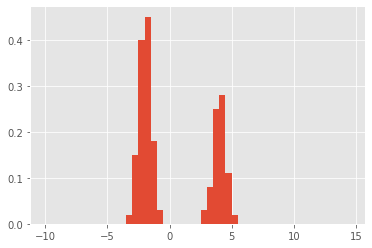

In [86]:
## Normalized histogram. 
# Let's check that we get a bimodal density

binsize = 0.5
edges = np.arange(-10,15,binsize) # varying the step size in the sequence means changing the number of bins. Consider what happens when changing the value of binsize
plt.figure(100)
plt.hist(data, edges, density=True)

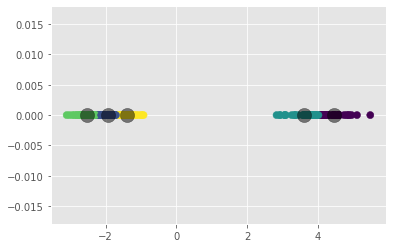

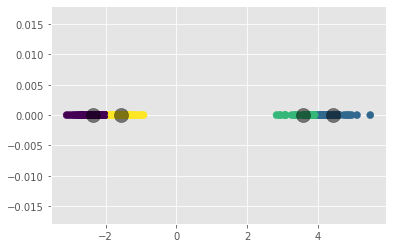

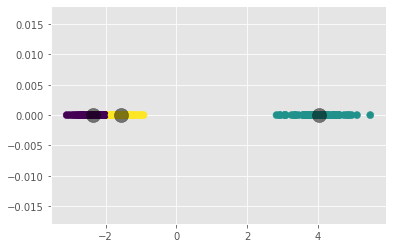

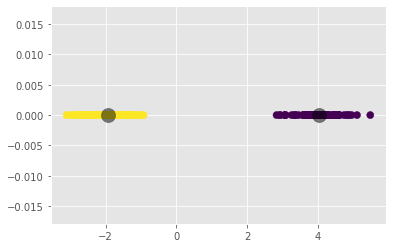

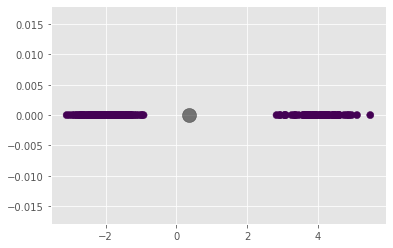

In [82]:
## Apply K-Means with k taking values 5 to 1. 
# We want to see what happens when we apply k-means in the absence of prior
# knowledge as to how many clusters we can expect in the data. Here we know
# there is only one cluster but that's because we generated the data
# ourselves. 

for k in np.arange(5,0,-1):
    
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data) # Fit KMeans model with k cluster        
    idx = kmeans.predict(data) # Predict class membership
    plt.figure(k)
    plt.scatter(data[:, 0], np.zeros(len(data[:,0])), c=idx, s=50, cmap='viridis') # Borrowing style from tutorial
    C = kmeans.cluster_centers_
    plt.scatter(C[:, 0], np.zeros(len(C[:,0])), c='black', s=200, alpha=0.5); # Plotting centroids

plt.show()


**Q3.** Finally, do the same with 1000 two-dimensional random data points from a distribution of your choice
(e.g., bivariate Gaussian distribution). Here, you could generate many more classes (or consider that
a single class is made up of multiple blobs). Again, apply k-means for various values of k. Plot the
final clustering to see what happened. See whether the results make sense given how you generated
the data.

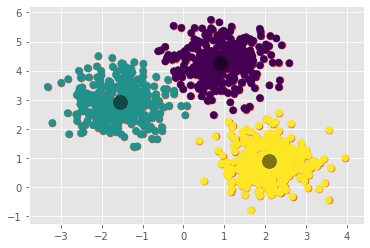

In [91]:
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

clusters = 3

X, y_true = make_blobs(n_samples=1000, centers=clusters,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

kmeans = KMeans(n_clusters=clusters)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

(array([1., 0., 0., ..., 0., 0., 1.]),
 array([-3.10156936, -3.1007108 , -3.09985224, ...,  5.48233125,
         5.48318981,  5.48404837]),
 <a list of 10000 Patch objects>)

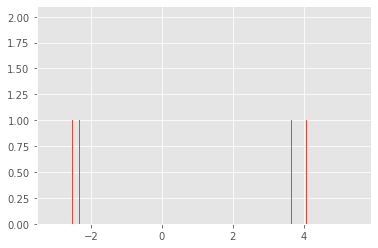

**Extension.** In your own time and if you are interested, consider coding your own version of the algorithm,
ensuring it generalises to data of any dimension.